In [27]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import os,sys
opj = os.path.join
from copy import deepcopy
from tqdm import tqdm
import pickle as pkl
import pandas as pd
import torch.nn.functional as F

from ex_biology import p
from dset import get_dataloader, load_pretrained_model

# adaptive-wavelets modules
from losses import get_loss_f
from train import Trainer
from evaluate import Validator
from transform1d import DWT1d
from utils import get_1dfilts, get_wavefun, low_to_high
from wave_attributions import Attributer
from visualize import cshow, plot_1dfilts, plot_1dreconstruct, plot_wavefun

# evaluation
from matplotlib import gridspec
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from feature_transform import max_transformer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# load results

In [3]:
(train_loader, test_loader) = get_dataloader(p.data_path, 
                                             batch_size=p.batch_size,
                                             is_continuous=True)   

In [6]:
X, y = iter(train_loader).next()

In [8]:
x = X.detach().numpy().squeeze()

In [ ]:
nums = [1, 5, 6]
for num in nums:
    plt.plot(x[num], lw=6.5, color='orangered')
    plt.axis('off')
    plt.savefig(f'ex_{num}.pdf', bbox_inches='tight')
    plt.show()

# pick canonical events

In [55]:
# get dataloader and model
# (train_loader, test_loader), model = load_dataloader_and_pretrained_model(p)
# torch.manual_seed(p.seed)

# load data and model
(train_loader, test_loader) = get_dataloader(p.data_path, 
                             batch_size=2000,
                             is_continuous=True)   

model = load_pretrained_model(p.model_path, device=device) 
X, y = iter(test_loader).next()
y = y.flatten().numpy()
args = np.argsort(y)[::-1]
X = X.numpy().squeeze()
X = X[args]
Xpos = X[X[:, -1] < 0][50:]
Xneg = X[X[:, -1] < 0][-20:]

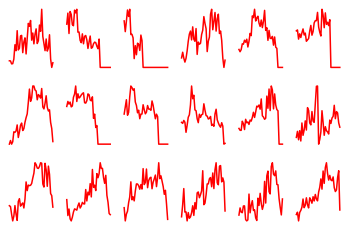

In [58]:
R, C = 3, 6
for i in range(R * C):
    plt.subplot(R, C, i + 1)
    plt.plot(Xpos[i], color='red')
    plt.axis('off')
plt.savefig('events_pos.pdf', bbox_inches='tight')
plt.show()

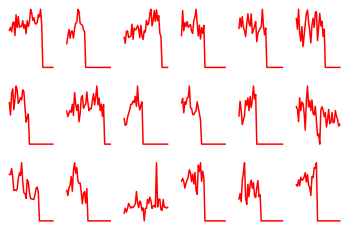

In [59]:
R, C = 3, 6
for i in range(R * C):
    plt.subplot(R, C, i + 1)
    plt.plot(Xneg[i], color='red')
    plt.axis('off')
plt.savefig('events_neg.pdf', bbox_inches='tight')
plt.show()